<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-description" data-toc-modified-id="Project-description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project description</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Step-by-step-guide" data-toc-modified-id="Step-by-step-guide-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Step-by-step guide</a></span></li></ul></li><li><span><a href="#Example-solution" data-toc-modified-id="Example-solution-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Example solution</a></span><ul class="toc-item"><li><span><a href="#Load-some-utility-functions" data-toc-modified-id="Load-some-utility-functions-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load some utility functions</a></span></li><li><span><a href="#Download-and-import-the-dataset" data-toc-modified-id="Download-and-import-the-dataset-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Download and import the dataset</a></span></li><li><span><a href="#Estimate-TF-activities-with-Decoupler" data-toc-modified-id="Estimate-TF-activities-with-Decoupler-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Estimate TF activities with Decoupler</a></span></li><li><span><a href="#Obtain-a-prior-knowledge-network-of-signaling-with-OmniPath" data-toc-modified-id="Obtain-a-prior-knowledge-network-of-signaling-with-OmniPath-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Obtain a prior knowledge network of signaling with OmniPath</a></span></li><li><span><a href="#Run-Carnival-to-infer-a-signaling-network-from-perturbations-to-TFs" data-toc-modified-id="Run-Carnival-to-infer-a-signaling-network-from-perturbations-to-TFs-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Run Carnival to infer a signaling network from perturbations to TFs</a></span></li></ul></li></ul></div>

# Analysis of mechanism of action of kinase inhibitors on cancer cells from perturbational gene expression data

**Group project for the *"From transcriptomics to mechanistic models of signalling"* session in the 2023 PerMedCoE Summer School**

- Pablo Rodriguez Mier (pablo.rodriguez-mier@uni-heidelberg.de)
- Denes Turei (turei.denes@gmail.com)<br><br>
_[Saez-Rodriguez Group](https://saezlab.org/), Institute for Computational Biomedicine, Heidelberg University_<br><br>

## Project description

### Introduction

This project aims to explore how kinase inhibitors affect gene expression and cellular pathways in cancer cells. Through differential gene expression analysis, estimation of transcription factor activities, drug ranking, data visualisation, and pathway activity assessment, the exercise seeks to hypothesise the mechanism of action of these drugs and support these hypotheses with scientific evidence. Automation tools are used to contextualise the findings and propose potential signalling interactions between drug targets and transcription factors.

### Step-by-step guide

1. Select a cell line from the [PANACEA dataset](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE186341) and perform differential expression analysis (e.g. using [limma-Voom](https://master.bioconductor.org/packages/release/workflows/vignettes/RNAseq123/inst/doc/limmaWorkflow.html) [[1](https://ucdavis-bioinformatics-training.github.io/2018-June-RNA-Seq-Workshop/thursday/DE.html)], DESeq2 or [PyDESeq2](https://pydeseq2.readthedocs.io/en/latest/) [[2](https://decoupler-py.readthedocs.io/en/latest/notebooks/bulk.html#Differential-expression-analysis)]) between controls and each condition (32 conditions in total, each is a different kinase inhibitor). Optionally, use the [DU-145 cell line](https://github.com/saezlab/PerMedCoE_summer_school_2023/blob/1865ba224c9920ce1097a92637d3904e896c17e4/dataset/panacea.zip) already processed by us using limma (recommended).
2. [Estimate transcription factor activities](https://decoupler-py.readthedocs.io/en/latest/notebooks/bulk.html#Transcription-factor-activity-inference) with DecoupleR from gene expression signatures (observed changes in gene expression between control and treatment).
3. Rank drugs based on the magnitude of changes induced in the transcriptional profile of the cell (for example, as measured by the number of significant changes in TFs, or absolute fold change of significant TFs). 
4. For the 1st top drug, generate a [volcano plot](https://decoupler-py.readthedocs.io/en/latest/generated/decoupler.plot_volcano.html) showing log fold change in the x-axis and -log(adjusted p-value) in the y-axis with DecoupleR. Inspect. Try to find evidence in literature that links the drug to those transcription factors.
5. [Estimate pathway activities](https://decoupler-py.readthedocs.io/en/latest/notebooks/bulk.html#Pathway-activity-inference) using DecoupleR+PROGENy and the differential expression of genes (not TF activities). Create a barplot with DecoupleR showing the predicted effects on cancer pathways. For the pathway with the largest absolute predicted effect, plot its target genes restricted to the top 300 genes in the PROGENy signature (300 with the highest absolute weights).
6. Given the previous analysis, hypothesise about the mechanism of action of the drug. Find the canonical targets of the drug (e.g. [targets of MK2206](https://www.ebi.ac.uk/chembl/g/#search_results/targets/query=MK2206)) and try to think if there is a potential signalling from drug targets to altered transcription factors. Gather some scientific evidence in favour and against the predicted results. Make some conclusions out of this.
7. Use CARNIVAL with OmniPath to automate the previous step. Obtain a signalling network with OmniPath ([Section 4.1.4](https://github.com/saezlab/PerMedCoE_summer_school_2023/blob/main/PerMedCoE_summerschool_signaling.ipynb)) and contextualise it using the estimated transcription factor activities. Use CARNIVAL to find a potential mechanistic explanation of altered signalling between drug targets and transcription factors ([Section 6.1](https://github.com/saezlab/PerMedCoE_summer_school_2023/blob/main/PerMedCoE_summerschool_signaling.ipynb)).


## Example solution


Now it's time to put in practice what we have learnt. For this, we are going to use data from [PANACEA](https://www.synapse.org/#!Synapse:syn21763589/wiki/601659), a DREAM challenge for elucidation of the mechanisms of action of different kinases inhibitors on cancer. In this dataset, we have the transcriptional profile of different cancer cells to 32 kinases inhibitors. 

For this tutorial, we are going to use the DU-145 cell line data (human prostate cancer cell line), we are going to infer the transcriptional program of the cell for each drug with Decoupler, and we are going to pick one particular drug to infer a signaling network.<br><br>

<figure>
<img src="https://github.com/saezlab/PerMedCoE_tools_virtual_course_2023/raw/main/assets/panacea-fig.png" alt="knapsack" width="600"/>
<figcaption>
<strong>Figure 9. Design of the PANACEA DREAM Challenge.</strong>
</figcaption>
</figure>

To simplify the things a little bit, we have already proccessed the data for the DU-145 cell line, and we performed differential expression analysis between controls (cells with DMSO treatment) and treatments with drugs (data collected after 24h of exposition).


### Load some utility functions

Make sure that you have cloned the `PerMedCoE_tools_virtual_course_2023` repository into the `permedcoe` directory, located in the same place as this notebook. We will import the functions from `utils.py` to make our life easier.

In [1]:
from permedcoe.utils import (
    plot,
    get_problem_values,
    get_selected_edges_and_nodes,
    set_problem_value,
)

### Download and import the dataset

For convenience, we have already preprocessed the transcriptomics data for the DU-145 cell line, for the control (DMSO) and the transcriptional profile of the 32 kinase inhibitors. Contrasts between Treatment vs Control were performed using LIMMA for differential analysis, and results were combined in a single csv file. The resulting file contains for each gene, the LIMMA parameters such as moderated t statistic, p-value, fold-change, etc. 

We are going to download and unzip the content. The zip file contains also a README.txt with a full description of the preprocessing done to the raw data.

In [2]:
#!unzip permedcoe/dataset/panacea.zip
from zipfile import ZipFile as zip
with zip('dataset/panacea.zip', 'r') as zf:
    zf.extractall('.')

In [3]:
#!cat panacea/README.txt
with open('panacea/README.txt', 'rb') as f:
    print(f.read().decode('utf-8'))

In [53]:
# We will use pandas to load dataframes 
import pandas as pd

# PANACEA DU-145 Treatment vs Control (32 kinase inhibitors as treatments, control DMSO)
df_panacea = pd.read_csv('panacea/panacea.csv')
df_panacea.head()

,gene,logFC,AveExpr,t,P.Value,adj.P.Val,B,contrast
0,GLMP,-1.533270,5.234243,-4.969321,0.000002,0.025465,2.007286,DACOMITINIB-DMSO
1,IRF6,-3.022769,2.835268,-4.147802,0.000060,0.256666,0.023416,DACOMITINIB-DMSO
2,DMAC1,-0.764417,6.912396,-4.136381,0.000063,0.256666,-0.002540,DACOMITINIB-DMSO
3,ASIC1,-1.917409,3.211175,-3.994881,0.000108,0.316739,-0.320054,DACOMITINIB-DMSO
4,HNF1B,-1.887455,3.835072,-3.945813,0.000130,0.316739,-0.428367,DACOMITINIB-DMSO


> **5.1-Q1 Question**: which are the top 5 most affected genes by LAPATINIB drug (genes that show the largest absolute effect size or LogFC)? Create a volcano plot with Decoupler
>> TIP: You can get a subset of the dataframe with `df_panacea[df_panacea.column_name == 'value']`

In [54]:
# 5.1-A1 code for answer

Now, we will prepare the differential expression dataframe to be used with Decoupler. For this, we need to put the conditions (drugs) as rows, and genes as columns. We can use the `pivot` method [from pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html).

In [55]:
# Here, LIMMA was used as the linear model for testing, and the moderated 
# t-statistic (t) is the column we will use to assign values for each gene/drug.
# These values will be used for the enrichment test in Decoupler.
df_differential_analysis = df_panacea.pivot(index='contrast', columns='gene', values='t')
df_differential_analysis.head()

gene,A1BG-AS1,A2M-AS1,A4GALT,AAAS,AACS,AADAT,AAGAB,AAK1,AAMDC,AAMP,...,ZW10,ZWILCH,ZWINT,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
contrast,,,,,,,,,,,,,,,,,,,,,
AEE788-DMSO,1.071176,0.960408,-0.387508,1.866703,-0.769665,-2.911092,-0.265391,1.457491,-0.694798,-0.276921,...,1.646816,1.151379,-0.759036,-0.334819,-2.100825,-0.574978,-1.338866,2.388873,0.574207,-1.073677
AFATINIB-DMSO,-0.747972,1.424949,0.817884,0.085568,0.119139,0.228957,1.133671,-0.980007,-0.448743,1.481979,...,0.761940,-0.956599,0.624453,-1.100996,-2.100825,0.266645,-2.092996,-1.082792,0.423500,1.699526
AZD5363-DMSO,1.604877,0.959802,-0.451428,-0.573895,-1.424303,-0.846673,0.930989,0.122182,-0.601979,0.547009,...,-0.288122,0.933968,1.082086,-1.100996,0.064395,0.736621,-1.080824,-2.240034,-0.912340,0.704897
BAFETINIB-DMSO,1.701826,0.049725,-0.398428,-0.254057,0.554880,0.305161,0.025093,-0.230327,1.297891,0.751023,...,-0.162775,-0.026056,-1.270673,1.515962,-0.523424,1.111975,0.015295,2.114835,1.285860,-2.393474
BOSUTINIB-DMSO,-1.293843,0.205803,-0.084557,-0.092892,-0.012286,0.368860,-0.077168,0.832060,-0.631431,0.337568,...,1.814425,1.136093,1.301641,0.033328,-1.544174,-0.256288,-1.394846,0.769991,0.371694,0.378180


### Estimate TF activities with Decoupler

In [56]:
# https://decoupler-py.readthedocs.io/en/latest/notebooks/dorothea.html
import decoupler as dc

net = dc.get_dorothea(organism='human', levels=['A','B','C'])
net

,source,confidence,target,weight
0,MYC,A,TERT,1.000000
1,FOS,A,NTS,1.000000
2,FOS,A,NTF3,1.000000
3,FOS,A,NFKB1,-1.000000
4,FOS,A,NEFL,1.000000
...,...,...,...,...
32270,LEF1,C,NKD1,0.333333
32271,LEF1,C,NETO2,0.333333
32272,LEF1,C,MYO18B,0.333333
32273,LEF1,C,PHLDB2,0.333333


In [57]:
tf_estimation, p_vals = dc.run_mlm(mat=df_differential_analysis, net=net, source='source', target='target', weight='weight', verbose=True)
tf_estimation.head()

Running mlm on mat with 32 samples and 12204 targets for 278 sources.


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.35it/s]


,AHR,AR,ARID2,ARID3A,ARNT,ASCL1,ATF1,ATF2,ATF3,ATF4,...,ZNF217,ZNF24,ZNF263,ZNF274,ZNF384,ZNF584,ZNF592,ZNF639,ZNF644,ZNF740
AEE788-DMSO,1.530737,-0.644328,-0.463537,-0.951382,-0.770795,-0.738250,-0.286374,0.454096,-0.111231,0.751576,...,0.200499,-1.026714,1.203317,-0.157918,-1.808794,-1.480756,0.043425,-1.807872,0.102801,-1.437833
AFATINIB-DMSO,0.066131,-0.866910,0.972003,-1.493532,-0.025959,-0.838545,-0.047258,1.534634,-0.253968,-1.359771,...,1.035659,-0.786511,-0.687860,-2.498894,0.423469,0.244571,-1.041320,0.245124,1.761517,0.812881
AZD5363-DMSO,-0.346871,0.792055,-1.744481,-1.851617,0.790182,1.443817,0.289276,0.157008,-0.940690,-4.045668,...,-1.108269,-0.417181,1.079303,-0.858021,-1.582403,-1.041440,-0.129818,-1.152337,0.787089,-1.462244
BAFETINIB-DMSO,1.384168,-1.362105,-0.632436,-1.832749,-1.443249,-0.125506,1.294920,0.042113,0.436501,-2.330456,...,0.348873,-0.276648,1.820069,0.933328,-0.999613,1.667517,-0.169357,-2.060236,-0.654825,0.247103
BOSUTINIB-DMSO,0.693355,-1.233976,0.531789,-0.112879,-0.277540,-1.044027,0.404707,-1.920163,-0.759365,-0.515785,...,-1.096212,0.409898,-0.954694,0.439186,-0.524079,0.649842,-0.576365,-1.503532,1.311455,0.507941



> **5.2-Q1. Question:** how would you choose the top-3 most similar drugs to LAPATINIB in terms of TF activity profile? (*HINT: some Pandas functions can be of help with this https://pandas.pydata.org/pandas-docs/stable/reference/frame.html*)

In [58]:
# 5.2-Q1 your code here

A very quick and unsupervised way to identify similarities between drugs is to find some top N transcription factors that show high variability across drugs, and use those to cluser drugs by similarity. We can do this quickly with Pandas and Seaborn using the `clustermap` function:

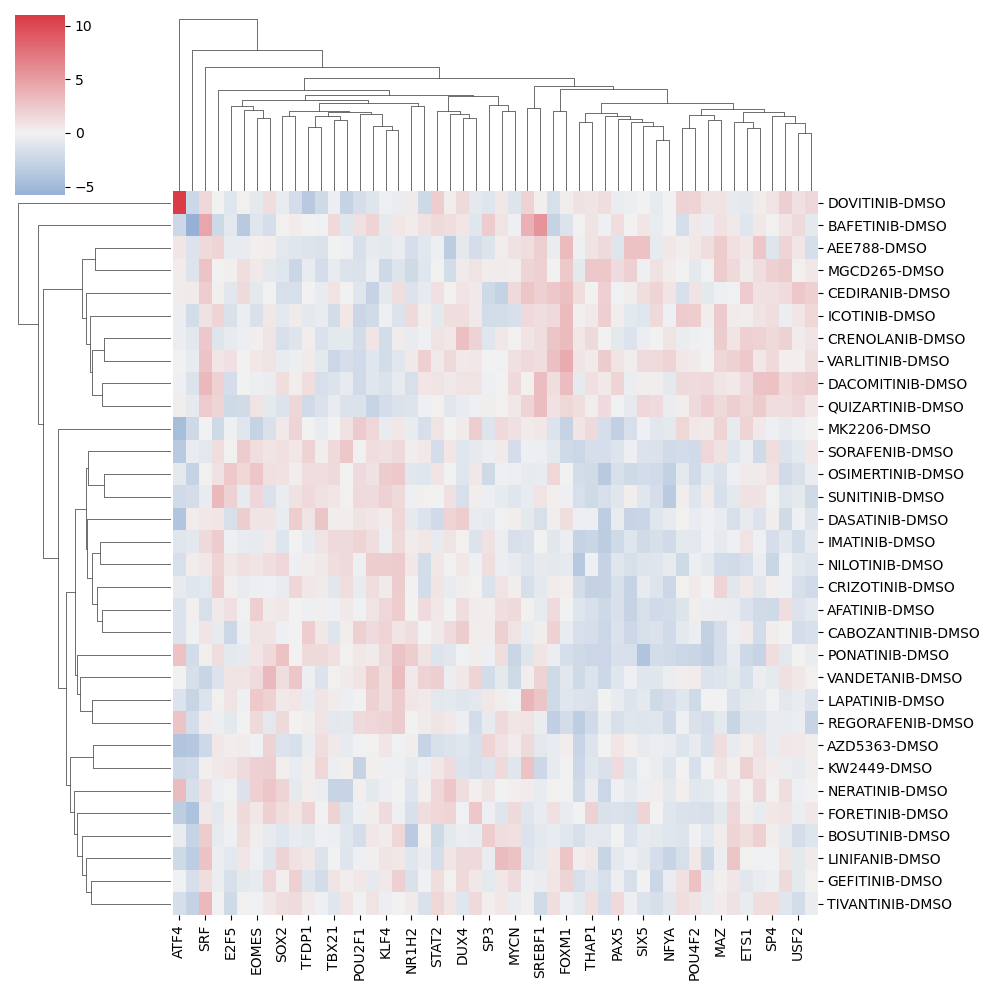

In [59]:
import seaborn as sns 

# We calculate top 50 most variable TFs across drugs
top_variable_tfs = tf_estimation.std(axis=0).sort_values().tail(50)

# Colormap from blue (decreased activity) to red (increased activity)
cmap = sns.diverging_palette(250, 10, center='light', as_cmap=True)
cmap.set_bad(color='white')

# Clustermap using only the selected TFs (columns of the dataframe)
sns.clustermap(tf_estimation.loc[:, top_variable_tfs.index], cmap=cmap, center=0);

Now, let's focus our attention for example to **Lapatinib drug**. We can easily plot top `N` TFs by absolute effect size in DU-145 with decoupler using the `plot_barplot` function:

In [60]:
# Analysis of drug
treatment = 'LAPATINIB-DMSO'

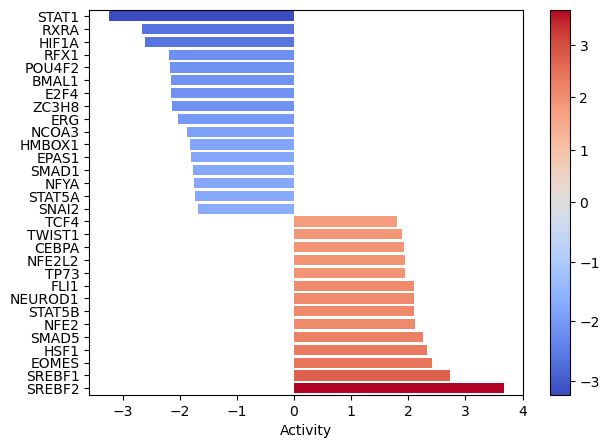

In [61]:
dc.plot_barplot(tf_estimation, treatment, top=30, vertical=True)

Another interesting thing we can do is to filter also by p-value, so we can get TFs whose changes between treatment and control are statistically significant (even though the effect size can be low)

In [62]:
significant_tfs = p_vals.loc[treatment, p_vals.loc[treatment] <= 0.05]
significant_tfs

BMAL1      0.031045
E2F4       0.031113
EOMES      0.015389
ERG        0.042492
FLI1       0.035562
HIF1A      0.009238
HSF1       0.019479
NEUROD1    0.035530
NFE2       0.034442
POU4F2     0.030116
RFX1       0.028727
RXRA       0.007801
SMAD5      0.024504
SREBF1     0.006184
SREBF2     0.000245
STAT1      0.001219
STAT5B     0.035508
ZC3H8      0.032625
Name: LAPATINIB-DMSO, dtype: float64

### Obtain a prior knowledge network of signaling with OmniPath


From DrugBank: "Lapatinib is a 4-anilinoquinazoline kinase inhibitor of the intracellular tyrosine kinase domains of both epidermal growth factor receptor (HER1/EGFR/ERBB1) and human epidermal growth factor receptor type 2 (HER2/ERBB2)with a dissociation half-life of ≥300 minutes"

In [63]:
drug_targets = ['EGFR', 'ERBB2']

In [64]:
import omnipath as op

# We get only interactions from SIGNOR http://signor.uniroma2.it/
pkn = op.interactions.OmniPath.get(databases=['SIGNOR'], genesymbols=True)
pkn.head()

,source,target,source_genesymbol,target_genesymbol,is_directed,is_stimulation,is_inhibition,consensus_direction,consensus_stimulation,consensus_inhibition,curation_effort,references,sources,n_sources,n_primary_sources,n_references,references_stripped
0,Q13976,Q13507,PRKG1,TRPC3,True,False,True,True,False,True,9,HPRD:14983059;KEA:14983059;ProtMapper:14983059...,HPRD;HPRD_KEA;HPRD_MIMP;KEA;MIMP;PhosphoPoint;...,15,8,2,14983059;16331690
1,Q13976,Q9HCX4,PRKG1,TRPC7,True,True,False,True,True,False,3,SIGNOR:21402151;TRIP:21402151;iPTMnet:21402151,SIGNOR;TRIP;iPTMnet,3,3,1,21402151
2,Q13438,Q9HBA0,OS9,TRPV4,True,True,True,True,True,True,3,HPRD:17932042;SIGNOR:17932042;TRIP:17932042,HPRD;SIGNOR;TRIP,3,3,1,17932042
3,P18031,Q9H1D0,PTPN1,TRPV6,True,False,True,True,False,True,11,DEPOD:15894168;DEPOD:17197020;HPRD:15894168;In...,DEPOD;HPRD;IntAct;Lit-BM-17;SIGNOR;SPIKE_LC;TRIP,7,6,2,15894168;17197020
4,P63244,Q9BX84,RACK1,TRPM6,True,False,True,True,False,True,2,SIGNOR:18258429;TRIP:18258429,SIGNOR;TRIP,2,2,1,18258429


Given that we are running this on Google Colab and using free solvers, we can end up having problems solving CARNIVAL on big networks. To avoid this problem, we can decrease the size of the initial network by keeping only well curated interactions.

In [65]:
subset_pkn = pkn[(pkn.curation_effort >= 6) & (pkn.consensus_direction==True)]
subset_pkn.head()

,source,target,source_genesymbol,target_genesymbol,is_directed,is_stimulation,is_inhibition,consensus_direction,consensus_stimulation,consensus_inhibition,curation_effort,references,sources,n_sources,n_primary_sources,n_references,references_stripped
0,Q13976,Q13507,PRKG1,TRPC3,True,False,True,True,False,True,9,HPRD:14983059;KEA:14983059;ProtMapper:14983059...,HPRD;HPRD_KEA;HPRD_MIMP;KEA;MIMP;PhosphoPoint;...,15,8,2,14983059;16331690
3,P18031,Q9H1D0,PTPN1,TRPV6,True,False,True,True,False,True,11,DEPOD:15894168;DEPOD:17197020;HPRD:15894168;In...,DEPOD;HPRD;IntAct;Lit-BM-17;SIGNOR;SPIKE_LC;TRIP,7,6,2,15894168;17197020
6,Q16539,P49137,MAPK14,MAPKAPK2,True,True,False,True,True,False,63,ACSN:11274345;ACSN:12738796;ACSN:15187187;ACSN...,ACSN;BEL-Large-Corpus_ProtMapper;BioGRID;CA1;C...,37,24,34,10581204;10922375;11042204;11274345;11551945;1...
7,P49137,Q13151,MAPKAPK2,HNRNPA0,True,True,False,True,True,False,10,HPRD:12456657;PhosphoSite:26602816;ProtMapper:...,HPRD;PhosphoPoint;PhosphoSite;PhosphoSite_Prot...,12,8,6,12456657;17287340;20932473;21173571;25716654;2...
8,P49137,O95453,MAPKAPK2,PARN,True,False,True,True,False,True,10,PhosphoSite:20932473;ProtMapper:20932473;SIGNO...,HPRD_MIMP;MIMP;PhosphoSite;PhosphoSite_MIMP;Ph...,15,7,5,16964243;18669648;19690332;20932473;21173571


In [66]:
def as_tuples(df):
    return list(set((r.source_genesymbol, 
           int(r.is_stimulation) - int(r.is_inhibition), 
           r.target_genesymbol) for _, r in df.iterrows()))

# We call corneto method 'from_sif_tuples' to create a Graph for carnival
G_pkn = cn.Graph.from_sif_tuples(as_tuples(subset_pkn))
G_pkn.num_edges, G_pkn.num_vertices

(4251, 2344)

We can see that the interactions are now imported as a graph. We can plot interactions between nodes by obtaining a sugraph with CORNETO. For example, let's check if the first row of the PKN dataframe matches what we have in the graph:

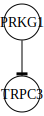

In [67]:
G_pkn.subgraph(['PRKG1', 'TRPC3']).plot()

> **5.3-Q1 Question:** which type of interaction exists between `MTOR` and `ULK2` ?

In [68]:
# 5.3-A1: your code here

### Run Carnival to infer a signaling network from perturbations to TFs

In [69]:
# Select row `treatment` (LAPATINIB), and as columns, only the genes with p-val <= 0.05
# NOTE: The absolute value of the measurements is used to weight the importance
sel_measurements = tf_estimation.loc[treatment, significant_tfs.index]
sel_measurements

BMAL1     -2.156748
E2F4      -2.155885
EOMES      2.423441
ERG       -2.028883
FLI1       2.102140
HIF1A     -2.603548
HSF1       2.336556
NEUROD1    2.102504
NFE2       2.115102
POU4F2    -2.168822
RFX1      -2.187479
RXRA      -2.661014
SMAD5      2.249413
SREBF1     2.738353
SREBF2     3.668945
STAT1     -3.235283
STAT5B     2.102758
ZC3H8     -2.136912
Name: LAPATINIB-DMSO, dtype: float32

In [70]:
# Run carnival from drug target of DASATINIB
drug_targets = {'EGFR': -1, 'ERBB2': -1}
drug_tf_measurements = sel_measurements.to_dict()

# Pre-processing: prune the graph based on unreachable nodes
G_pkn_pruned = G_pkn.prune(drug_targets.keys(), drug_tf_measurements.keys())
G_pkn_pruned.num_edges, G_pkn.num_vertices

(948, 2344)

In [71]:
problem, carnival_graph = cn.methods.runVanillaCarnival(
    drug_targets, 
    drug_tf_measurements, 
    G_pkn_pruned,
    solver='SCIP',
    verbosity=1)

                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) Jun 01 03:54:25 PM: Your problem has 4773 variables, 33 constraints, and 0 parameters.
(CVXPY) Jun 01 03:54:25 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 01 03:54:25 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 01 03:54:25 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jun 01 03:54:25 PM: Compiling problem (target solver=SCIP).
(CVXPY) Jun 01 03:54:25 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing

In [73]:
se, sv = get_selected_edges_and_nodes(carnival_graph, problem)
len(se), len(sv)

(40, 31)

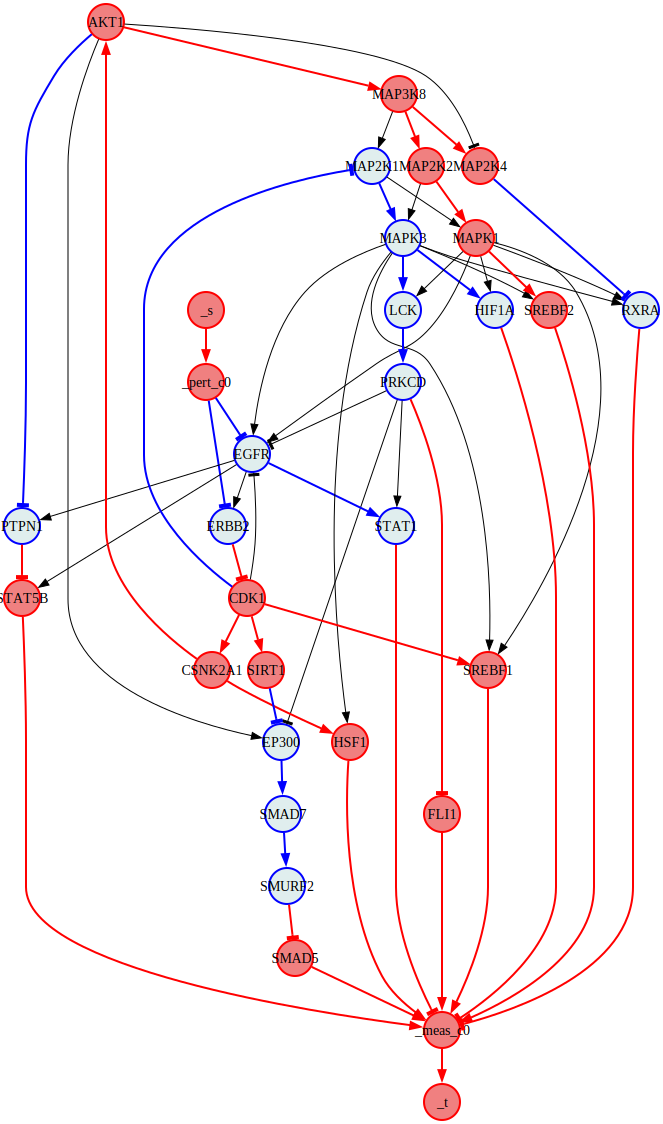

In [74]:
plot(carnival_graph.subgraph(sv), format=get_problem_values(carnival_graph, problem))